## SCRAPING SITO DEL CENTRO RICERCA ICAR

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://www.icar.cnr.it/en/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
ICAR – CNR


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['https://www.icar.cnr.it/en/archivio-associati-di-ricerca/',
 'https://www.icar.cnr.it/en/direttore1/',
 '#',
 'https://www.icar.cnr.it/en/eventi/',
 'https://www.icar.cnr.it/en/notizie/la-sirena-digitale-incanta-il-mann/',
 '#outer-wrap',
 'https://www.linkedin.com/company/1081350/',
 'https://www.icar.cnr.it/en/archivio-workshop-istituto/',
 'https://www.icar.cnr.it/en/notizie/',
 'https://www.icar.cnr.it/en/tecnologia/',
 '#content',
 'https://www.icar.cnr.it/en/gruppi-di-ricerca/',
 'https://www.youtube.com/channel/UCBBXyzoJWgSFQIPWgfAhAOw?view_as=subscriber',
 'https://www.icar.cnr.it/en/notizie/storytelling-interattivo-per-sensibilizzare-i-bambini-sul-bullismo/',
 'https://www.facebook.com/ComunicazioneICAR/',
 'https://www.icar.cnr.it/en/persone/',
 'https://www.icar.cnr.it/en/gruppi-tecnologici/',
 'https://www.icar.cnr.it/en/attrezzature/',
 'https://www.icar.cnr.it/en/notizie/call-for-papers-special-issue-big-data-for-ehealth-applications/',
 'https://www.icar.cnr.it/en/pres

In [4]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
lista_url2 = list(filter(lambda x: x.startswith('https://www.icar.cnr.it/en/'), res))
lista_url2=list(set(lista_url2))
lista_url2

['https://www.icar.cnr.it/en/chi-siamo/',
 'https://www.icar.cnr.it/en/archivio-associati-di-ricerca/',
 'https://www.icar.cnr.it/en/direttore1/',
 'https://www.icar.cnr.it/en/notizie/la-sirena-digitale-incanta-il-mann/',
 'https://www.icar.cnr.it/en/eventi/',
 'https://www.icar.cnr.it/en/archivio-workshop-istituto/',
 'https://www.icar.cnr.it/en/notizie/',
 'https://www.icar.cnr.it/en/tecnologia/',
 'https://www.icar.cnr.it/en/gruppi-di-ricerca/',
 'https://www.icar.cnr.it/en/notizie/storytelling-interattivo-per-sensibilizzare-i-bambini-sul-bullismo/',
 'https://www.icar.cnr.it/en/persone/',
 'https://www.icar.cnr.it/en/gruppi-tecnologici/',
 'https://www.icar.cnr.it/en/attrezzature/',
 'https://www.icar.cnr.it/en/notizie/call-for-papers-special-issue-big-data-for-ehealth-applications/',
 'https://www.icar.cnr.it/en/press-kit/',
 'https://www.icar.cnr.it/en/sedi/',
 'https://www.icar.cnr.it/en/notizie/un-modello-previsionale-network-based-per-valutare-landamento-della-diffusione-epide

In [5]:
indices=[4,7,13,17,24,26,33,35,36,37,38]
lista_url2 = [lista_url2[i] for i in indices]
lista_url2

['https://www.icar.cnr.it/en/eventi/',
 'https://www.icar.cnr.it/en/tecnologia/',
 'https://www.icar.cnr.it/en/notizie/call-for-papers-special-issue-big-data-for-ehealth-applications/',
 'https://www.icar.cnr.it/en/notizie/passano-alla-valutazione-europea-anche-5-progetti-che-coinvolgono-il-cnr-icar/',
 'https://www.icar.cnr.it/en/notizie/urban-intelligence-at-the-edge/',
 'https://www.icar.cnr.it/en/intelligenza-artificiale/',
 'https://www.icar.cnr.it/en/pubblicazioni/',
 'https://www.icar.cnr.it/en/data-science/',
 'https://www.icar.cnr.it/en/',
 'https://www.icar.cnr.it/en/progetti/',
 'https://www.icar.cnr.it/en/valorizzazione-della-ricerca/']

In [6]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"site-content"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Events – ICAR',
 'Technology – ICAR',
 'Call for Papers: Special Issue “Big Data for eHealth Applications” – ICAR',
 '6 projects involving the CNR-ICAR pass to the European evaluation – ICAR',
 'Urban Intelligence at the Edge – ICAR',
 'Artificial Intelligence – ICAR',
 'Pubblications – ICAR',
 'Data Science – ICAR',
 'ICAR – CNR',
 'Projects – ICAR',
 'Technology Transfer – ICAR']

In [7]:
texts[1]

'\n\n\n\n\n\n\n\n\n\n\nTechnology\nThe “technology” thematic area includes both technological development and applied research activities aimed at the design and implementation of innovative technological platforms and application services, and the design and implementation of robotic frameworks that aim at the naturalization of interactions.\nAnother fundamental aspect of this area concerns the study of implementations of artificial intelligence algorithms on dedicated hardware both to achieve high performance and to create original prototypes capable of performing their functions independently.\nThe technological groups belonging to this area have among their tasks that of technology transfer. That is the transfer of knowledge, technologies, production methods, prototypes and services developed in the production processes.\nIn this context, particular attention is paid to the development of interoperability models for health information systems on a national scale (with specific refe

In [8]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',' ').replace('\xa0', ' '))

#print(texts2)

In [9]:
texts2[1]

'           Technology The “technology” thematic area includes both technological development and applied research activities aimed at the design and implementation of innovative technological platforms and application services, and the design and implementation of robotic frameworks that aim at the naturalization of interactions. Another fundamental aspect of this area concerns the study of implementations of artificial intelligence algorithms on dedicated hardware both to achieve high performance and to create original prototypes capable of performing their functions independently. The technological groups belonging to this area have among their tasks that of technology transfer. That is the transfer of knowledge, technologies, production methods, prototypes and services developed in the production processes. In this context, particular attention is paid to the development of interoperability models for health information systems on a national scale (with specific reference to the El

In [10]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    element = ''.join(i for i in element if not i.isdigit())
    texts3.append(element)

In [17]:
texts3[7]

'Data Science The thematic area “ Data Science ” the study of , , , , and for the management , analysis , and extraction of knowledge from complex and heterogeneous data , such as , , , , structured data , geo - , - media , and - dimensional data , with time . The general goal in the enrichment of the data themselves , on the one side in an explicit way , by providing semantic information through the use of semantic of artificial intelligence and data analytics , and on the other side in an implicit way , by automatically domain knowledge by of computational intelligence and machine learning . From the application point of view , the in the research to this area allow making the of business analytics , decision support , and content support and fruition more efficient and reliable . In this perspective , it is of high relevance the fact that the ( , , ) to be in of scalable data computational , suitable for the , variety , and speed of complex data resulting from the above - applicatio

## TEXT CLEANING

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

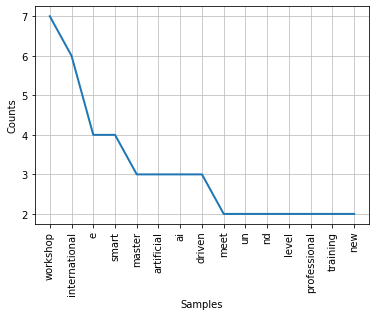

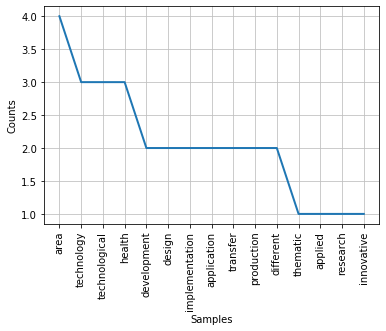

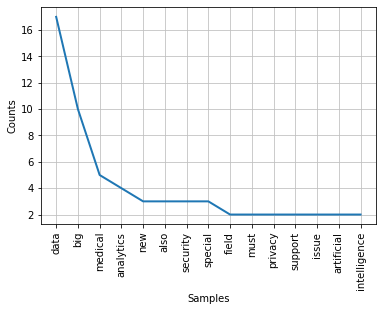

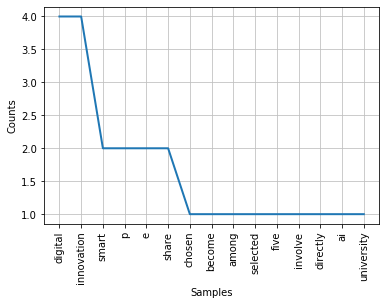

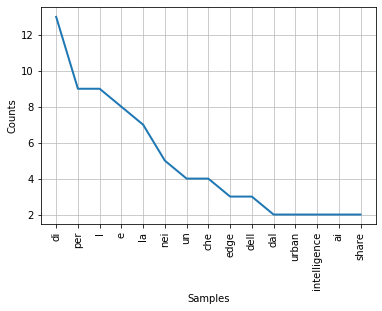

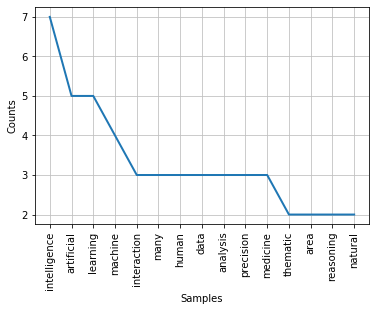

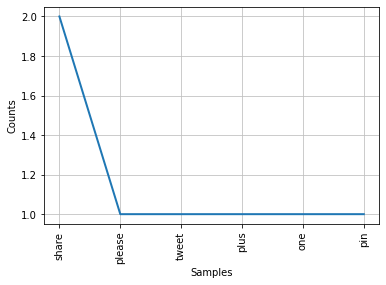

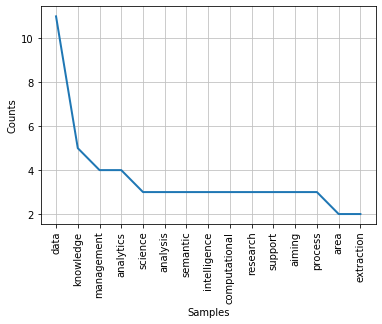

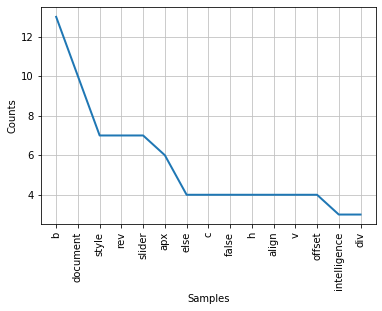

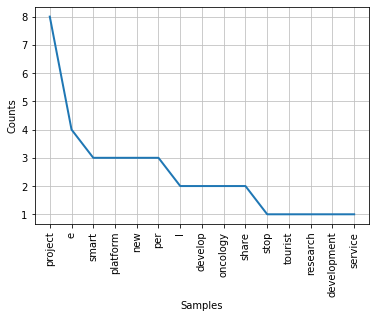

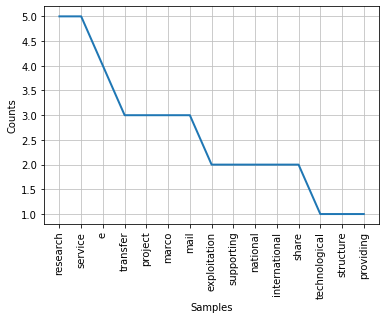

In [20]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts3[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [ ]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

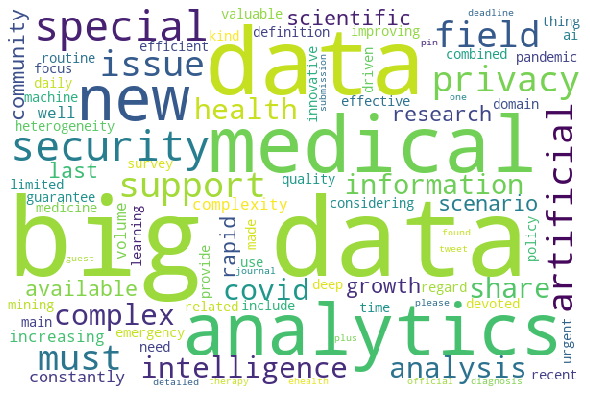

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[2]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

In [22]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)

str

In [23]:
tot_text=' '.join( [w for w in tot_text.split() if len(w)>1] )
tot_text = ''.join(i for i in tot_text if not i.isdigit())

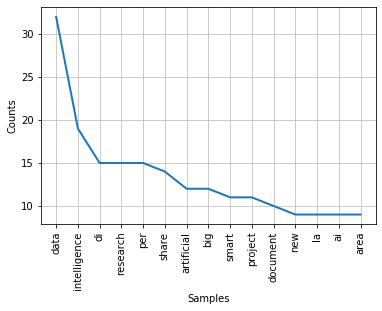

In [24]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [25]:
textfile = open('ICAR.txt', 'w')
textfile.write(tot_text)
textfile.close()

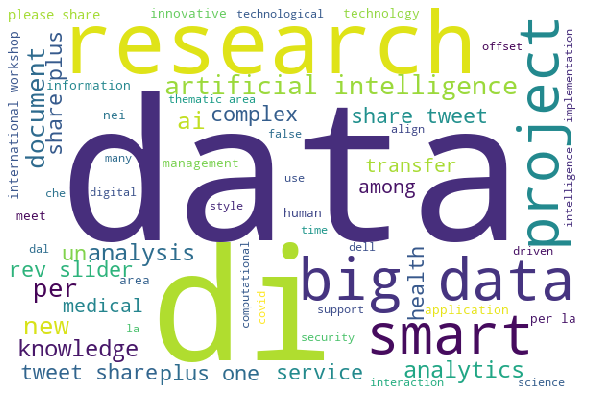

In [26]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()